### Finite difference methods (FDM) for partial differential equations (PDE)

Main references

[^1]: Timothy Sauer (2017) *Numerical Analysis* 3rd Edition. (p. 419-427)

#### Take-aways

After studying this chapter, we will be able to

TBF



#### Finite difference method for elliptic equations



##### Problem (Poisson equation)


**Problem of interest** (Poisson equation on a rectangular domain)

Given a rectangule $D=(x_l, x_r)\times(y_b, y_t)$, a function $f$ and functions on each piece of boundaries $g_1, g_2, g_3, g_4$, find $u:D\cup\partial D \to \mathbb{R}$ that satisfies

$$
\left\{
\begin{aligned}
\Delta u (x,y) & = f(x,y) \quad \text{for } (x,y)\in D \\
u\left(x, y_b\right) & =g_1(x) \quad \text{for } x_l \le x \le x_r \\
u\left(x, y_t\right) & =g_2(x) \quad \text{for } x_l \le x \le x_r \\
u\left(x_l, y\right) & =g_3(y) \quad \text{for } y_b \le y \le y_t \\
u\left(x_r, y\right) & =g_4(y) \quad \text{for } y_b \le y \le y_t
\end{aligned}
\right.
$$

**Remark** (Preliminary)

- Laplacian: 
  
  $$
  \Delta u(x,y):=\nabla\cdot(\nabla u (x,y))=\frac{\partial^2}{\partial x^2} u (x,y) + \frac{\partial^2}{\partial y^2} u (x,y)
  $$
- $\partial D$ means the boundaries of a domain $D$. 

**Remark** (Application of Poisson equation)

- It describes the relationship between a *potential* and the source of potential. (e.g., gravitational potential and distribution of mass density, electrostatic potential and electrical charge density, etc.) 
- In the physical language, the gradient of potential causes the change of something (e.g., motion), which is usually called some sort of *field* (gravitational field, electric field, etc.). Then, the divergence of that field often represents something we can observe or measure. 
- These comments are made by the instructor, a non-physicist, only for motivational purposes after a bit of search from Wikipedia and reading Sauer (2017) pp. 419--420. For precise information, consult more in-depth sources.

**Remark** (About Poisson equation)

- It is an example of elliptic equation.
- There is no time variable if one relates it to physical applications.

**Remark** (Terminology)

- When $f(x,y) \equiv 0$, Poisson equation is called *Laplace equation*.
- Solutions of Laplace equation are called *harmonic functions*.

#### Common settings/Notation

| symbol | meaning |
|---|---|
| $h$ | grid spacing in $x$ direction |
| $k$ | grid spacing in $y$ direction |
| $x_i$ | grid point $x_i = a + ih$ in $x$ direction |
| $y_j$ | grid point $y_j = a + jk$ in $y$ direction |
| $u(x_i, y_j)$ | true solution evaluated at $(x_i, y_j)$ |
| $w_{i, j}$ | numerical solution meant to approximate $u(x_i, y_j)$ |


##### Finite Difference Method

**Centered different quotient for 2nd derivative**

$$
u_{xx}(x_i, y_j)\approx \frac{w_{i+1, j}-2 w_{i j}+w_{i-1, j}}{h^2}
$$

$$
u_{yy}(x_i, y_j)\approx \frac{w_{i, j+1}-2 w_{i j}+w_{i, j-1}}{k^2}
$$


**Numerical scheme**

Replace $u_{xx}$ and $u_{yy}$, then the discrete version of the PDE reads:

$$
\frac{w_{i-1, j}-2 w_{i j}+w_{i+1, j}}{h^2}+\frac{w_{i, j-1}-2 w_{i, j}+w_{i, j+1}}{k^2}=f\left(x_i, y_j\right)
$$

where $x_i=x_l+(i-1) h$ and $y_j=y_b+(j-1) k$ for $1 \leq i \leq m$ and $1 \leq j \leq n$.
$$


If $h=k$, then

$$
\frac{w_{i-1, j}+w_{i+1, j} -4 w_{i j} + w_{i, j-1}+w_{i, j+1}}{h^2}=f\left(x_i, y_j\right)
$$



**Stencil** (FDM for Poisson equation)


| | |
|---|---|
| ![Stencil of FDM for Poisson equation 1](https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/15BVPs/elliptic/dd01.png) | ![Stencil of FDM for Poisson equation 1](https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/15BVPs/elliptic/dd02.png) |


Figure: Department of Electrical and Computer Engineering, University of Waterloo 

The figure uses different symbols from us. Substitute:

| | Figure | Our settings |
|---|---|---|
| left end | $x_a$ | $x_l$ |
| right end | $x_b$ | $x_r$ |
| bottom end | $y_a$ | $y_b$ |
| top end | $y_b$ | $y_t$ |
| grid spacing | $k=h$ | may $k\neq h$ |
| numerical solution | $u$ | $w$ |
| indexing | start from 0 | start from 1 |




![Grid domain FDM for Poisson equation](https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/15BVPs/elliptic/region02.png)


##### Matrix form



- The numerical solution at the whole grid points must be found all at once.
  - One can see this intuitively by examining dependency of numerical solution using the stencils: we cannot determine row by row in the grid domain.
  - This is a stark opposite to time dependent problems such as heat equation or wave equation.
- This entails reorganization for manangement of indexing. 
  - We do not have tools to treat 2D array of unknowns as a single vector in a nice way unlike matrix equation can handle 1D array readily.

**Remark** (Aside - Block tridiagonal matrix)

- When $m=n$, homogenous boundary condition is imposed, and the boundary conditions are treated separately, the FDM for the Poisson equation leads the coefficient matrix $A\in\mathbb{R}^{(m-2)^2\times (m-2)^2}$, called stiffness matrix, 

$$
\mathrm{A}
=\frac{1}{h^2}
\left[\begin{array}{ccccc}
\mathrm{A}_m & -\mathrm{I}_m & \mathrm{O}_m & \ldots & \mathrm{O}_m \\
-\mathrm{I}_m & \mathrm{~A}_m & \ddots & & \vdots \\
\mathrm{O}_m & \ddots & \ddots & -\mathrm{I}_m & \mathrm{O}_m \\
\vdots & & -\mathrm{I}_m & \mathrm{~A}_m & -\mathrm{I}_m \\
\mathrm{O}_m & \ldots & \mathrm{O}_m & -\mathrm{I}_m & \mathrm{~A}_m
\end{array}\right]
$$

where $I_m, O_m\in\mathbb{R}^{(m-2)\times (m-2)}$ are identity and zero matrices respectively and $A_m\in\mathbb{R}^{(m-2)\times (m-2)}$ is defined by

$$
\mathrm{A}_m=\left[\begin{array}{ccccc}
4 & -1 & 0 & \ldots & 0 \\
-1 & 4 & \ddots & & \vdots \\
0 & \ddots & \ddots & -1 & 0 \\
\vdots & & -1 & 4 & -1 \\
0 & \ldots & 0 & -1 & 4
\end{array}\right].
$$

- We are going to detour dealing with this matrix by reindexing.

**Indexing conversion**

Introduce the following 2D-1D index conversion

$$
(i, j) \longleftrightarrow i+(j-1) m.
$$

Note that 
- $i=1,2,\dots,m$ and $j=1,2,\cdots,n$, including the boundary grid points.
- This is one-to-one, hence invertible for indices that appear in our settings.


**Numerical solution vector**

$$
v_{i+(j-1) m}=w_{i j}
$$

**Coefficent Matrix**

- $A$ is $mn$-by-$mn$ matrix.
- $A_{pq}$ represents the $q$-th coefficient of the $p$-th equation, where $p$-th equation comes from the numerical scheme with $(i,j)$ via $p=i+(j-1) m$.
  - $p$-th row consists of at most five non-zero values. (Why?)

1. Interior grid points
  
- Assuming indexing starts from 1,
  - for $i\in\{2,3,\cdots,m-1\}$
  - for $j\in\{2,3,\cdots,n-1\}$

  $$
  \begin{aligned}
  &\begin{aligned}
  A_{i+(j-1) m, i+(j-1) m} & =-\frac{2}{h^2}-\frac{2}{k^2} \\
  A_{i+(j-1) m, i+1+(j-1) m} & =\frac{1}{h^2} \\
  A_{i+(j-1) m, i-1+(j-1) m} & =\frac{1}{h^2} \\
  A_{i+(j-1) m, i+j m} & =\frac{1}{k^2} \\
  A_{i+(j-1) m, i+(j-2) m} & =\frac{1}{k^2}
  \end{aligned}
  \end{aligned}
  $$

**Right hand side vector**

$$
b_{i+(j-1) m}=f\left(x_i, y_j\right)
$$

**Boundary conditions**

$$
\begin{array}{cll}
\text { Bottom } & A_{i+(j-1) m, i+(j-1) m}=1, & b_{i+(j-1) m}=g_1\left(x_i\right) \text { for } j=1, \quad 1 \leq i \leq m \\
\text { Top side } & A_{i+(j-1) m, i+(j-1) m}=1, & b_{i+(j-1) m}=g_2\left(x_i\right) \text { for } j=n, \quad 1 \leq i \leq m \\
\text { Left side } & A_{i+(j-1) m, i+(j-1) m}=1, & b_{i+(j-1) m}=g_3\left(y_j\right) \text { for } i=1, \quad 1<j<n \\
\text { Right side } & A_{i+(j-1) m, i+(j-1) m}=1, & b_{i+(j-1) m}=g_4\left(y_j\right) \text { for } i=m, \quad 1<j<n
\end{array}
$$

**Index conversion table**

  | $x$ | $y$ | Coefficient number $q$ |
  | :---: | :---: | :--- |
  | $i$ | $j$ | $i+(j-1) m$ |
  | $i+1$ | $j$ | $i+1+(j-1) m$ |
  | $i-1$ | $j$ | $i-1+(j-1) m$ |
  | $i$ | $j+1$ | $i+j m$ |
  | $i$ | $j-1$ | $i+(j-2) m$ |

**Remark** (Dimensions)

- There are $(m-2)\times(n-2)$ true unknowns. 
- Cosmetic unknowns are also included in the unknown vector (i.e., numerical solution).
  - They correspond to trivial equalities to the boundary conditions in the right hand side vector.



###### Indexing starting from 0

**Indexing starting from 0**

**Numerical solution vector** (index starting from 0)

$$
v_{i+j m}=w_{i j}
$$


**Coefficent matrix** (index starting from 0)

  - for $i\in\{1,2,\cdots,m-2\}$
  - for $j\in\{1,2,\cdots,n-2\}$

  $$
  \begin{aligned}
  &\begin{aligned}
  A_{i+j m, i+j m} & =-\frac{2}{h^2}-\frac{2}{k^2} \\
  A_{i+j m, (i+1)+ j m} & =\frac{1}{h^2} \\
  A_{i+j m, (i-1)+j m} & =\frac{1}{h^2} \\
  A_{i+j m, i+(j+1) m} & =\frac{1}{k^2} \\
  A_{i+j m, i+(j-1) m} & =\frac{1}{k^2}
  \end{aligned}
  \end{aligned}
  $$

**Right hand side vector** (index starting from 0)

  - for $i\in\{1,2,\cdots,m-2\}$
  - for $j\in\{1,2,\cdots,n-2\}$

$$
b_{i+j m}=f\left(x_i, y_j\right)
$$

**Boundary conditions** ((index starting from 0))

$$
\begin{array}{clll}
\text { Bottom } & A_{i+j m, i+j m}=1, & b_{i+j m}=g_1\left(x_i\right) \text { for } j=0, & 0 \le i < m \\
\text { Top side } & A_{i+j m, i+j m}=1, & b_{i+j m}=g_2\left(x_i\right) \text { for } j=n-1, & 0 \le i < m \\
\text { Left side } & A_{i+j m, i+j m}=1, & b_{i+j m}=g_3\left(y_j\right) \text { for } i=0, & 1 \le j < n-1 \\
\text { Right side } & A_{i+j m, i+j m}=1, & b_{i+j m}=g_4\left(y_j\right) \text { for } i=m-1, & 1 \le j < n-1
\end{array}
$$

**Index conversion table** (index starting from 0)

  | $x$ | $y$ | Coefficient number $q$ |
  | :---: | :---: | :--- |
  | $i$ | $j$ | $i+j m$ |
  | $i+1$ | $j$ | $(i+1)+j m$ |
  | $i-1$ | $j$ | $(i-1)+j m$ |
  | $i$ | $j+1$ | $i+(j+1) m$ |
  | $i$ | $j-1$ | $i+(j-1) m$ |

**Remark** (Terminology)

- $A$ is often called *stiffness matrix*.
- $b$ is often called *loading vector*.

**Remark** (Boundary conditions and dimensions)

- We can make the problem $(m-2)(n-2)$-by-$(m-2)(n-2)$ matrix problem by directly feeding the boundary condition to the solution.

##### Computation


**Example** (Laplace equation)

Compute the numerical solution of on the square domain $[0,1]\times[0,1]$:

$$
\left\{\begin{array}{l}
\Delta u = 0 \\
u(x, 0)=\sin \pi x \\
u(x, 1)=\sin \pi x \\
u(0, y)=0 \\
u(1, y)=0
\end{array}\right.
$$


**Caution** (indexing)

- Indexing starts with 0 as oppose to previous discretization.
- This discrepancy is unavoidable: since from our textbook uses Matlab and we are using Python, we cannot have all (a) the same index between textbook and the current example, (b) consistency of this notes with the textbook, and (c) clean code in Python in this example. I have chosen to give up (a).

In [31]:
import numpy as np
from internallib import tridiag
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 16

def convert_ind(ind, shape):
    """
    Convert a 1D index to a 2D index, or vice versa.

    Input:
        ind: (int or tuple) Index to be converted. 
            2D index (i, j) is given, i corresponds to x location,
            and j corresponds to y location. 
        shape: (tuple) Shape of the 2D array.
    Note:

    CAUTION: 
        2nd dim, m, is the length of grid in x direction (horizontal)
        but, the 1st component of ind (e.g., i of (i, j)) gives the 
        the location of x. This is why the order of ind is opposite 
        depending on "1D to 2D" or "2D to 1D".
        Phylosophy: (i, j) means really mathematical grid index so that
            it corresponds to (x, y) coordinate while 1D index is 
            converted into array index, hence 
            (row, col) <--> (y, x) numpy array.
    """
    # Assume shape is (n, m) or n-by-m
    m = shape[1]

    if isinstance(ind, int) or len(ind) == 1:
        return (ind//m, ind%m)
    elif len(ind) == 2:
        return ind[1]*m + ind[0]
    else:
        raise ValueError("The input type is not supported.")


###### Sanity check (`convert_ind`)

In [32]:
n = 5
m = 7
shape = (n, m)

# test 1D to 2D
#   here second component of ind is the x location
#   so that the output can be used as ndarray index.
for i in range(n*m):
    print(i, convert_ind(i, shape))

0 (0, 0)
1 (0, 1)
2 (0, 2)
3 (0, 3)
4 (0, 4)
5 (0, 5)
6 (0, 6)
7 (1, 0)
8 (1, 1)
9 (1, 2)
10 (1, 3)
11 (1, 4)
12 (1, 5)
13 (1, 6)
14 (2, 0)
15 (2, 1)
16 (2, 2)
17 (2, 3)
18 (2, 4)
19 (2, 5)
20 (2, 6)
21 (3, 0)
22 (3, 1)
23 (3, 2)
24 (3, 3)
25 (3, 4)
26 (3, 5)
27 (3, 6)
28 (4, 0)
29 (4, 1)
30 (4, 2)
31 (4, 3)
32 (4, 4)
33 (4, 5)
34 (4, 6)


In [33]:
# CAUTION: i ranges from 0 to m-1, and j ranges from 0 to n-1
#       (i, j) for n-by-m
#   Here, the first component of ind is the x location
#   so that it matches the mathematical grid domain.
#   Index engineering is done behind the scene.

for j in range(n):
    for i in range(m):
        print((i, j), convert_ind((i, j), shape))


(0, 0) 0
(1, 0) 1
(2, 0) 2
(3, 0) 3
(4, 0) 4
(5, 0) 5
(6, 0) 6
(0, 1) 7
(1, 1) 8
(2, 1) 9
(3, 1) 10
(4, 1) 11
(5, 1) 12
(6, 1) 13
(0, 2) 14
(1, 2) 15
(2, 2) 16
(3, 2) 17
(4, 2) 18
(5, 2) 19
(6, 2) 20
(0, 3) 21
(1, 3) 22
(2, 3) 23
(3, 3) 24
(4, 3) 25
(5, 3) 26
(6, 3) 27
(0, 4) 28
(1, 4) 29
(2, 4) 30
(3, 4) 31
(4, 4) 32
(5, 4) 33
(6, 4) 34


**Vector and matrix creation**

In [34]:
def eval_2Dfun(f, x, y):
    """
    Return 2D array of evaluation f(x, y)

    Input:
        f: (function) Function to be evaluated.
        x: (1D array) x coordinate.
        y: (1D array) y coordinate.
    Output:
        f_vec: (2D array) Evaluation of f(x, y). Watch the flip of shape and index.
            Shape is (len(y), len(x)).
            f_vec[i, j] = f(x[j], y[i])
    """
    return f(x, y.reshape(-1, 1))


###### Sanity Check (`eval_2Dfun`)

In [35]:
n = 4
m = 7

fn = lambda x, y: x + y

x = np.arange(m)
y = np.arange(n)*10
f_grid = eval_2Dfun(fn, x, y)
print(f_grid)

[[ 0  1  2  3  4  5  6]
 [10 11 12 13 14 15 16]
 [20 21 22 23 24 25 26]
 [30 31 32 33 34 35 36]]


**Reorganize arrays**

convert 2D array to a vector

In [36]:
def to_vec(arr, shape=None):
    """
    Convert 2D array to 1D array in the context of 
    solving 2D elliptic problem using finite different method.

    Input:
        arr: (2D array) grid function.
        shape: (tuple) shape of the grid domain. Currently, not used.
    Output:
        vec: (1D array) 1D array of arr.
    """
    return arr.flatten()

In [37]:
# test `to_vec`
f_vec = to_vec(f_grid, (n, m))
print(f_vec)

# grid_fn[convert_ind(1D_index, shape)] = to_vec(grid_fn, shape)[1D_index]
print("\n", f"{'f_grid[2D index]' : ^20}{'f_vec[1D index]' : ^20}")
for i in range(n*m):
    print(f"{f_grid[convert_ind(i, shape)] : ^20}{to_vec(f_grid, shape)[i] : ^20}")


[ 0  1  2  3  4  5  6 10 11 12 13 14 15 16 20 21 22 23 24 25 26 30 31 32
 33 34 35 36]

   f_grid[2D index]    f_vec[1D index]   
         0                   0          
         1                   1          
         2                   2          
         3                   3          
         4                   4          
         5                   5          
         6                   6          
         10                  10         
         11                  11         
         12                  12         
         13                  13         
         14                  14         
         15                  15         
         16                  16         
         20                  20         
         21                  21         
         22                  22         
         23                  23         
         24                  24         
         25                  25         
         26                  26         
         

**Index conversion summary**

| Mathematical grid function | 2D array | 1D array |
|---|---|---|
| $(x, y)$ $\leftrightarrow$ `(i, j)` | $(y, x)$ $\leftrightarrow$ `(j, i)` | `j*m+i` |

- 2D array $\leftrightarrow$ 1D array: (y, x) handled by NumPy's row-major convection -- Just use `.reshape` or `.flatten`
  - `convert_ind` carries out "1D array $\rightarrow$ 2D array" manually for a single index in the conditional
    ```
    if isinstance(ind, int) or len(ind) == 1:
        return (ind//m, ind%m) # (y, x)
    ```
- Math grid function $\leftrightarrow$ 2D array: Flip `(i, j)` $\leftrightarrow$ `(j, i)`
- Math grid function $\leftrightarrow$ 1D array: `(i, j)` $\leftrightarrow$ `j*m+i`
  - `convert_ind` carries out `(i, j)` $\rightarrow$ `j*m+i` in the conditional:
    ```
    elif len(ind) == 2:
      return ind[1]*m + ind[0]
    ```

In [38]:

def solve_pois_eq(f, bc_b, bc_r, bc_t, bc_l, xl, xr, yb, yt, n, m):
    """
    Return numerical solution of Poisson equation on a rectangular domain 
    using finite difference method.
    
    Input:
        f: (function) right hand side function.
        bc_b: (function) Boundary condition at bottom.
        bc_r: (function) Boundary condition at right.
        bc_t: (function) Boundary condition at top.
        bc_l: (function) Boundary condition at left.
        xl: (float) Left boundary of the domain.
        xr: (float) Right boundary of the domain.
        yb: (float) Bottom boundary of the domain.
        yt: (float) Top boundary of the domain.
        m: (int) Number of spatial grid in x direction.
        n: (int) Number of spatial grid in y direction.
    Output:
        w: (2D array) Numerical solution.
    """
    # Create discrete domain
    x = np.linspace(xl, xr, m)
    y = np.linspace(yb, yt, n)

    h = x[1] - x[0]
    k = y[1] - y[0]

    shape = (n, m)

    # Construct loading vector
    f_vec = eval_2Dfun(f, x, y)
    b = to_vec(f_vec) # convert 2D array to 1D array

    # Construct coefficient matrix
    A = np.zeros((n*m, n*m))
    for i in range(1, m-1):
        for j in range(1, n-1):
            p = convert_ind((i, j), shape)
            A[p, p] = -2./(h*h) - 2./(k*k)
            A[p, convert_ind((i+1, j), shape)] = 1./(h*h)
            A[p, convert_ind((i-1, j), shape)] = 1./(h*h)
            A[p, convert_ind((i, j+1), shape)] = 1./(k*k)
            A[p, convert_ind((i, j-1), shape)] = 1./(k*k)

    # Initialize solution vector
    w = np.zeros(n*m)

    # Apply boundary condition
    for j in [0, n-1]:
        for i in range(m):
            p = convert_ind((i, j), shape)
            A[p, p] = 1.
            b[p] = bc_b(x[i]) if j == 0 else bc_t(x[i])
    
    for i in [0, m-1]:
        for j in range(n):
            p = convert_ind((i, j), shape)
            A[p, p] = 1.
            b[p] = bc_l(y[j]) if i == 0 else bc_r(y[j])
    
    # Solve the linear system
    w = np.linalg.solve(A, b)
    w = w.reshape(n, m)

    return w, x, y

In [39]:
xl = 0.
xr = 1.
yb = 0.
yt = 1.

n = 11
m = 11

# Note: f = lambda x, y: 0. returns 0., which is float. 
#   This lacks methods of numpy arrar.
f = lambda x, y: 0.*x + 0.*y

bc_b = lambda x: np.sin(np.pi*x)
bc_r = lambda y: 0.
bc_t = lambda x: np.sin(np.pi*x)
bc_l = lambda y: 0.


w, x, y = solve_pois_eq(f, bc_b, bc_r, bc_t, bc_l, xl, xr, yb, yt, n, m)


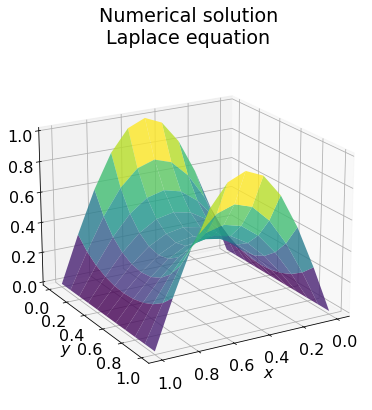

In [40]:
#%% plot
fig, ax = plt.subplots(1,1, figsize=(6.5, 6.5), subplot_kw={'projection':'3d'})

# surface plot (toggle)
# Note: need to reshape 1st coordinate to a column vector
ax.plot_surface(x, y.reshape(-1,1), w, cmap='viridis', alpha=0.8)
ax.set_title('Numerical solution\nLaplace equation')

# Change the angle of projection
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.view_init(elev=20, azim=60)

plt.show()


---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)